# Логистическая Регрессия


#### Описание набора данных:  

age     -  возраст: разница в 5 лет  
height(cm)   -      рост(см)  
weight(kg)  -   вес(кг)  
waist(cm)   -   талия(см) окружность талии длина  
eyesight(left)  -   зрение(слева)  
eyesight(right) -   зрение(справа)  
hearing(left)   -   слух(слева)  
hearing(right)  -   слух(справа)  
systolic    -   систолическое: артериальное давление  
relaxation  -   расслабление: артериальное давление 
fasting blood sugar -   уровень сахара в крови натощак  
Cholesterol     -   холестерин: общие  
triglyceride    -   триглицериды  
HDL     -   ЛПВП: тип холестерина  
LDL     -   ЛПНП: тип холестерина  
hemoglobin  -   гемоглобин  
Urine protein   -   белок  мочи  
serum creatinine    -   сывороточный креатинин  
AST -   АСТ: тип глутаминовой щавелевоуксусной трансаминазы  
ALT -   АЛТ: тип глутаминовой щавелевоуксусной трансаминазы  
Gtp -   ГТП: γ-ГТФ  
dental caries   -   кариес зубов  
smoking -   курение  

In [6]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score




print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)
print("\nДатасет: ")
!ls dataset

Виртуальное окружение
/home/maksim/anaconda3/envs/rapids-25.02/bin/python

Текущее положение: 
/home/maksim/develops/python/MAKSIM/ML/8_logistic_regression

Датасет: 
test.csv  train.csv


## 1) Загрузка

In [4]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

print('\nРазмер данных: ', train_df.shape)

print(train_df.head().to_string(index=False))

X = train_df.drop(columns=['smoking'])
y = train_df['smoking']
print("\nПропуски:")
train_df.isnull().sum()


Размер данных:  (38984, 23)
 age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  smoking
  35         170          85       97.0             0.9              0.9              1               1       118          78                   97          239           153   70  142        19.8              1               1.0   61  115  125              1        1
  20         175         110      110.0             0.7              0.9              1               1       119          79                   88          211           128   71  114        15.9              1               1.1   19   25   30              1        0
  45         155          65       86.0             0.9              0.9              1               1       110          80                   80          193        

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

## 2) Анализ

In [5]:
# 2) EDA: исследование данных
def explore_data(df):
    eda_results = pd.DataFrame({
        'Missing (%)': df.isnull().mean() * 100,
        'Min': df.min(),
        'Max': df.max(),
        'Mean': df.mean(),
        'Median': df.median(),
        'Variance': df.var(),
        'Quantile 0.1': df.quantile(0.1),
        'Quantile 0.9': df.quantile(0.9),
        'Quartile 1': df.quantile(0.25),
        'Quartile 3': df.quantile(0.75),
    })
    return eda_results

print("EDA Анализ\n")
explore_data(train_df)

EDA Анализ



,Missing (%),Min,Max,Mean,Median,Variance,Quantile 0.1,Quantile 0.9,Quartile 1,Quartile 3
age,0.0,20.0,85.0,44.127591,40.0,145.529573,30.0,60.0,40.0,55.0
height(cm),0.0,130.0,190.0,164.689488,165.0,84.410288,150.0,175.0,160.0,170.0
weight(kg),0.0,30.0,135.0,65.938718,65.0,166.321797,50.0,85.0,55.0,75.0
waist(cm),0.0,51.0,129.0,82.062115,82.0,86.989160,70.0,94.0,76.0,88.0
eyesight(left),0.0,0.1,9.9,1.014955,1.0,0.248529,0.6,1.5,0.8,1.2
eyesight(right),0.0,0.1,9.9,1.008768,1.0,0.243851,0.6,1.5,0.8,1.2
hearing(left),0.0,1.0,2.0,1.025369,1.0,0.024726,1.0,1.0,1.0,1.0
hearing(right),0.0,1.0,2.0,1.026190,1.0,0.025505,1.0,1.0,1.0,1.0
systolic,0.0,71.0,233.0,121.475631,120.0,186.145675,104.0,138.0,112.0,130.0
relaxation,0.0,40.0,146.0,75.994408,76.0,93.291147,64.0,88.0,70.0,82.0


## 3) Обучение

Лучшие параметры модели: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
Confusion Matrix:
[[4047  928]
 [1202 1620]]
Accuracy: 0.7268
Precision: 0.6358
Recall: 0.5741
F1 Score: 0.6034
ROC AUC Score: 0.8070


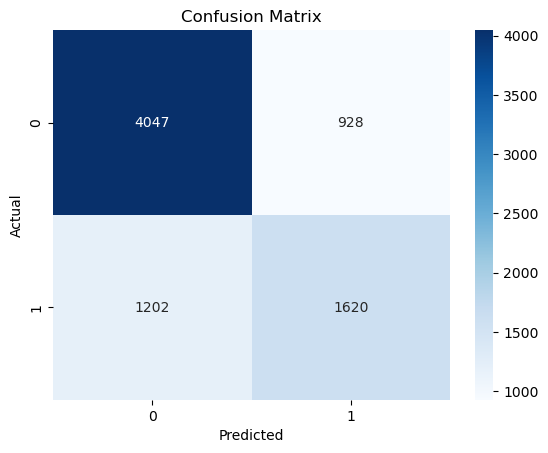

In [8]:

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Подбор гиперпараметров
solver_options = ['liblinear', 'lbfgs', 'saga']
penalty_options = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10]

best_model = None
best_score = 0
best_params = {}

for solver in solver_options:
    for penalty in penalty_options:
        if solver == 'lbfgs' and penalty == 'l1': 
            continue
        for C in C_values:
            try:
                model = LogisticRegression(solver=solver, penalty=penalty, C=C, random_state=42, max_iter=500)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_val_scaled)
                score = accuracy_score(y_val, y_pred)
                
                if score > best_score:
                    best_score = score
                    best_model = model
                    best_params = {'solver': solver, 'penalty': penalty, 'C': C}
            except Exception as e:
                continue

# Оценка качества модели
y_pred_best = best_model.predict(X_val_scaled)
y_pred_proba = best_model.predict_proba(X_val_scaled)[:, 1]

conf_matrix = confusion_matrix(y_val, y_pred_best)
accuracy = accuracy_score(y_val, y_pred_best)
precision = precision_score(y_val, y_pred_best)
recall = recall_score(y_val, y_pred_best)
f1 = f1_score(y_val, y_pred_best)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Вывод результатов
print(f"Лучшие параметры модели: {best_params}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


# Визуализация матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
